In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# anggap saja ini hasil load dari data .csv

data = load_breast_cancer()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset['label'] = data.target

dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Set jadi X, y
X = dataset.drop('label', axis=1)
y = dataset['label']

# split data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=2)

In [4]:
# preprocessing
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [9]:
# Opsi 1 : Modeling dengan sklearn
from sklearn.svm import LinearSVC

# declare model
svm = LinearSVC()

# train model
svm.fit(X_train_scaled, y_train)

# Evaluasi
y_pred = svm.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.39      1.00      0.57        45
           1       0.00      0.00      0.00        69

    accuracy                           0.39       114
   macro avg       0.20      0.50      0.28       114
weighted avg       0.16      0.39      0.22       114



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [10]:
# saya ingin memasukkan angka 3,5,7 ke dalam sebuah list

## cara 1 : Langsung massukan ke list saat definisi
my_list = [3,5,7]

## cara 2 : deklarasikan list kosong terlebih dahulu
my_list = []
my_list.append(3)
my_list.append(5)
my_list.append(7)
my_list

[3, 5, 7]

In [13]:
# Opsi 2 : Model dengan tensorflow(Keras)

## sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### deklarasi model
### Cara 1
model_ = Sequential([
                    Dense(10, activation='relu', input_shape=(30,)),
                    Dense(1, activation='sigmoid')
])
### Cara 2
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(30,)))
model.add(Dense(1, activation='sigmoid'))

### Training Model
### model compile
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_val_scaled, y_val))



Epoch 1/300
15/15 [==============================] - 5s 19ms/step - loss: 0.6716 - accuracy: 0.7011 - val_loss: 0.6507 - val_accuracy: 0.7807
Epoch 2/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6443 - accuracy: 0.7912 - val_loss: 0.6196 - val_accuracy: 0.8246
Epoch 3/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6188 - accuracy: 0.8418 - val_loss: 0.5972 - val_accuracy: 0.8070
Epoch 4/300
15/15 [==============================] - 0s 6ms/step - loss: 0.5993 - accuracy: 0.8549 - val_loss: 0.5766 - val_accuracy: 0.8158
Epoch 5/300
15/15 [==============================] - 0s 5ms/step - loss: 0.5802 - accuracy: 0.8703 - val_loss: 0.5558 - val_accuracy: 0.8684
Epoch 6/300
15/15 [==============================] - 0s 6ms/step - loss: 0.5607 - accuracy: 0.8703 - val_loss: 0.5341 - val_accuracy: 0.8509
Epoch 7/300
15/15 [==============================] - 0s 6ms/step - loss: 0.5407 - accuracy: 0.8659 - val_loss: 0.5132 - val_accuracy: 0.8509
Epoch 8/300


In [15]:
# Masukkan ke dalam dataframe
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.671575,0.701099,0.650736,0.780702
1,0.644302,0.791209,0.619631,0.824561
2,0.618823,0.841758,0.597201,0.807018
3,0.599252,0.854945,0.576576,0.815789
4,0.580191,0.870330,0.555839,0.868421


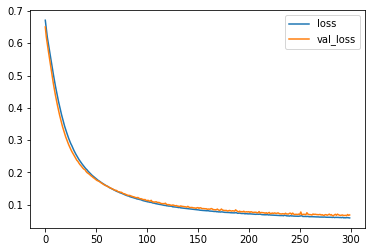

In [20]:
# Plotting Loss
metrics[['loss', 'val_loss']].plot();

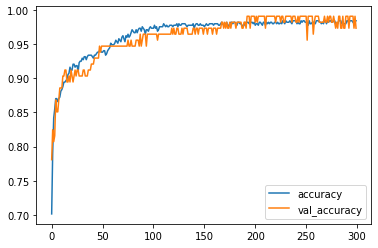

In [19]:
# Plotting Validatation 
metrics[['accuracy', 'val_accuracy']].plot();

In [23]:
## funtional API (memasukkan lebih dari 2 input)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

# fungsi layer
data_input = Input(shape=(30,))
hidden_layer_1 = Dense(11, activation='relu')(data_input)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_1)

# deklarasi model
model = Model(inputs=data_input, outputs=output_layer)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_8 (Dense)             (None, 11)                341       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


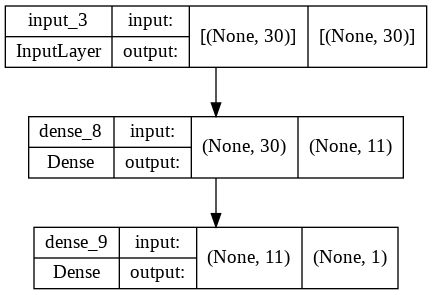

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [26]:
### Training Model
### model compile
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_val_scaled, y_val))


Epoch 1/300
15/15 [==============================] - 2s 30ms/step - loss: 0.6819 - accuracy: 0.6352 - val_loss: 0.6626 - val_accuracy: 0.6140
Epoch 2/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6516 - accuracy: 0.6484 - val_loss: 0.6365 - val_accuracy: 0.6404
Epoch 3/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6268 - accuracy: 0.7187 - val_loss: 0.6106 - val_accuracy: 0.8158
Epoch 4/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6062 - accuracy: 0.7978 - val_loss: 0.5892 - val_accuracy: 0.8860
Epoch 5/300
15/15 [==============================] - 0s 7ms/step - loss: 0.5862 - accuracy: 0.8176 - val_loss: 0.5693 - val_accuracy: 0.8860
Epoch 6/300
15/15 [==============================] - 0s 6ms/step - loss: 0.5680 - accuracy: 0.8484 - val_loss: 0.5485 - val_accuracy: 0.8860
Epoch 7/300
15/15 [==============================] - 0s 6ms/step - loss: 0.5495 - accuracy: 0.8462 - val_loss: 0.5313 - val_accuracy: 0.8860
Epoch 8/300


In [33]:
# Evaluasi Model (Binary)
import numpy as np

y_pred = model.predict(X_val_scaled)
y_pred = np.where(y_pred<0.5, 0, 1).squeeze()
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        45
           1       0.97      1.00      0.99        69

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Multi Class Classification (MNIST)

In [34]:
from tensorflow.keras.datasets import mnist # import dataset mnist from tensorflow

(X_train, y_train), (X_test, y_test) = mnist.load_data() # import data langsung kedalam variabel
X_train = X_train / 255.0
X_test = X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [35]:
# membuat function image
import matplotlib.pyplot as plt
def show_image(image):
  plt.imshow(image, cmap='binary')

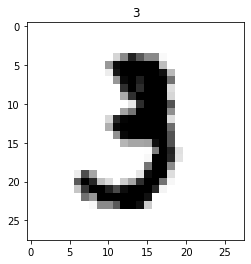

In [39]:
show_image(X_train[10]) # show image data
plt.title(y_train[10]); # create label 

In [44]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [46]:
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=32)

In [52]:
# Siapkan label
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [59]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Siapkan arsitektur
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) # lebih dari 3 class 'softmax'

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                50240     
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Training model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train_ohe,
                    batch_size=64,
                    epochs=10,
                    validation_data=(X_val, y_val_ohe))

Epoch 1/10
844/844 [==============================] - 4s 4ms/step - loss: 0.3822 - accuracy: 0.8926 - val_loss: 0.2433 - val_accuracy: 0.9312
Epoch 2/10
844/844 [==============================] - 4s 4ms/step - loss: 0.1928 - accuracy: 0.9451 - val_loss: 0.1738 - val_accuracy: 0.9498
Epoch 3/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1414 - accuracy: 0.9595 - val_loss: 0.1483 - val_accuracy: 0.9583
Epoch 4/10
844/844 [==============================] - 3s 4ms/step - loss: 0.1116 - accuracy: 0.9670 - val_loss: 0.1370 - val_accuracy: 0.9623
Epoch 5/10
844/844 [==============================] - 4s 5ms/step - loss: 0.0924 - accuracy: 0.9724 - val_loss: 0.1221 - val_accuracy: 0.9663
Epoch 6/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0780 - accuracy: 0.9767 - val_loss: 0.1185 - val_accuracy: 0.9668
Epoch 7/10
844/844 [==============================] - 3s 4ms/step - loss: 0.0667 - accuracy: 0.9800 - val_loss: 0.1153 - val_accuracy: 0.9695
Epoch 

In [61]:
import pandas as pd 

metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.382218,0.892556,0.243300,0.931167
1,0.192786,0.945074,0.173803,0.949833
2,0.141400,0.959481,0.148324,0.958333
3,0.111559,0.967019,0.136996,0.962333
4,0.092366,0.972426,0.122115,0.966333
5,0.078031,0.976667,0.118469,0.966833
6,0.066726,0.980037,0.115338,0.969500
7,0.057180,0.982741,0.114893,0.968667
8,0.051470,0.984204,0.108912,0.970167
9,0.044534,0.986259,0.105936,0.971167


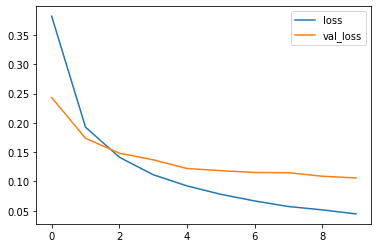

In [62]:
metrics[['loss', 'val_loss']].plot();

In [63]:
new_data = X_test[0]

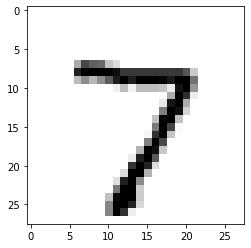

In [67]:
show_image(new_data)

In [69]:
hasil = model.predict(new_data.reshape((1,28,28)))
hasil.argmax() # mengeluarkan index mana yang paling maximum

7

In [70]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1) # kalau kasus klasifikasi menggunakan .argmax / kalau kasus binary pakai np.where
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



## Regresi dengan Tensorflow


In [73]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Siapkan data

housing = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=32)

#scale
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [78]:
# Modeling
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(8,)))
model.add(Dense(1)) # Activation : linear karena reggression

# Training
model.compile(loss='mean_squared_error',
              optimizer='adam')

history = model.fit(X_train, y_train, epochs=90, validation_data=(X_val, y_val))

Epoch 1/90
363/363 [==============================] - 3s 7ms/step - loss: 2.4340 - val_loss: 1.4516
Epoch 2/90
363/363 [==============================] - 3s 7ms/step - loss: 1.0777 - val_loss: 0.9271
Epoch 3/90
363/363 [==============================] - 2s 5ms/step - loss: 0.7875 - val_loss: 0.7137
Epoch 4/90
363/363 [==============================] - 1s 4ms/step - loss: 0.6399 - val_loss: 0.5933
Epoch 5/90
363/363 [==============================] - 1s 4ms/step - loss: 0.5587 - val_loss: 0.5162
Epoch 6/90
363/363 [==============================] - 1s 4ms/step - loss: 0.5123 - val_loss: 0.4788
Epoch 7/90
363/363 [==============================] - 2s 4ms/step - loss: 0.4885 - val_loss: 0.4636
Epoch 8/90
363/363 [==============================] - 2s 4ms/step - loss: 0.4764 - val_loss: 0.4498
Epoch 9/90
363/363 [==============================] - 1s 4ms/step - loss: 0.4677 - val_loss: 0.4409
Epoch 10/90
363/363 [==============================] - 1s 4ms/step - loss: 0.4680 - val_loss: 0.4379

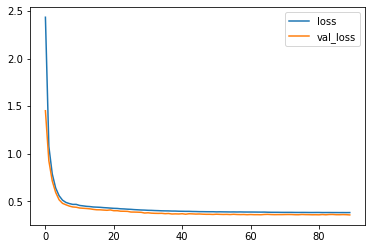

In [79]:
metrics = pd.DataFrame(history.history)
metrics.plot();

In [82]:
# model inference

new_data = X_test[0]
hasil = model.predict(new_data.reshape((1,8)))
hasil # mengeluarkan index mana yang paling maximum

array([[2.7765388]], dtype=float32)